In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
from scipy.stats import gmean, gstd

# Estimating distributions of protein expression levels

For getting at typical ranges for sampling in munge/cds_monte_carlo.py. 

In [2]:
# First estimate a log-normal distribution for the protein abundances
# Unified file of the protein-level measurements.
all_expression_data = pd.read_csv('../data/proteomes/all_protein_measurements.csv')

# Grab expression data from Schmidt chemostat experiments
mask = np.logical_and(all_expression_data.dataset == 'schmidt_2016',
                      all_expression_data.condition.str.startswith('chemo'))
schmidt_chemostat = all_expression_data[mask]

# Grab expression data for Xia experiments
mask = all_expression_data.dataset == 'xia_2022'
yeast_chemostat = all_expression_data[mask]

# Grab the cyano data
mask = all_expression_data.dataset == 'zavrel_2019'
cyano_bioreactor = all_expression_data[mask]

/var/folders/h9/fvnb4xnn63qg71jx6ncvg62w0000gn/T/ipykernel_90554/956134814.py:3: DtypeWarning: Columns (0,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  all_expression_data = pd.read_csv('../data/proteomes/all_protein_measurements.csv')


chemostat_u0.12: mu=5.02, sigma=2.30
chemostat_u0.2: mu=5.10, sigma=2.31
chemostat_u0.35: mu=5.22, sigma=2.32
chemostat_u0.5: mu=5.36, sigma=2.33


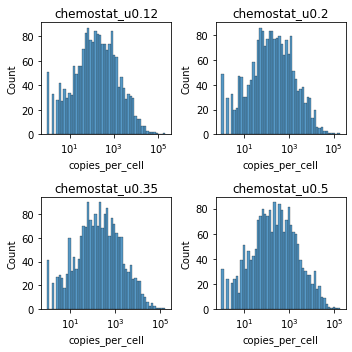

In [3]:
# Plot distributions of protein abundances --
# 1. Seems like log-normal is a good fit
# 2. sigma ≈ 2.3
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))
flat_axs = axs.flatten()

for i, (idx, gdf) in enumerate(schmidt_chemostat.groupby('condition')):
    plt.sca(flat_axs[i])
    plt.xscale('log')
    mask = gdf.copies_per_cell > 0
    sns.histplot(data=gdf[mask], x='copies_per_cell', bins=50)

    # Fit the log-scaled data to a Gaussian
    vals = gdf[mask].copies_per_cell.values
    gm = GaussianMixture(n_components=1)
    gm.fit(np.log(vals).reshape(-1, 1))
    mu = gm.means_[0][0]
    sigma = np.sqrt(gm.covariances_[0][0][0])
    print(f'{idx}: mu={mu:.2f}, sigma={sigma:.2f}')
    flat_axs[i].set_title(idx)

plt.tight_layout()
plt.show()

In [4]:
yeast_chemostat.condition.unique()

array(['chemostat_u0.027', 'chemostat_u0.044', 'chemostat_u0.102',
       'chemostat_u0.152', 'chemostat_u0.214', 'chemostat_u0.254',
       'chemostat_u0.284', 'chemostat_u0.334', 'chemostat_u0.379'],
      dtype=object)

chemostat_u0.027: mu=8.64, sigma=1.84
chemostat_u0.044: mu=8.73, sigma=1.82
chemostat_u0.102: mu=8.88, sigma=1.82
chemostat_u0.152: mu=9.04, sigma=1.81
chemostat_u0.214: mu=8.75, sigma=1.82
chemostat_u0.254: mu=8.86, sigma=1.82
chemostat_u0.284: mu=8.79, sigma=1.85
chemostat_u0.334: mu=8.89, sigma=1.83
chemostat_u0.379: mu=8.78, sigma=1.83


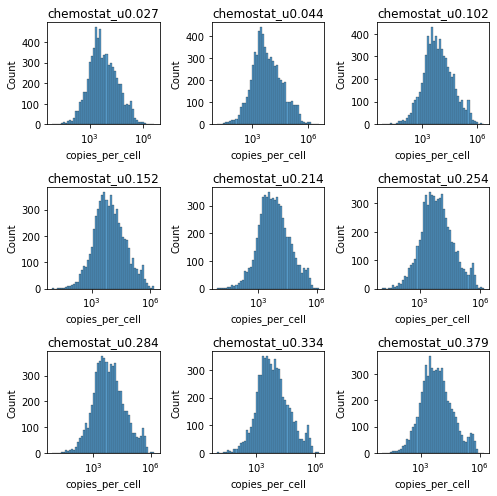

In [5]:
# Repeat for yeast chemostat data
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(7, 7))
flat_axs = axs.flatten()

for i, (idx, gdf) in enumerate(yeast_chemostat.groupby('condition')):
    plt.sca(flat_axs[i])
    plt.xscale('log')
    mask = gdf.copies_per_cell > 0
    sns.histplot(data=gdf[mask], x='copies_per_cell', bins=50)
    
    # Fit the log-scaled data to a Gaussian
    vals = gdf[mask].copies_per_cell.values
    gm = GaussianMixture(n_components=1)
    gm.fit(np.log(vals).reshape(-1, 1))
    mu = gm.means_[0][0]
    sigma = np.sqrt(gm.covariances_[0][0][0])
    print(f'{idx}: mu={mu:.2f}, sigma={sigma:.2f}')
    flat_axs[i].set_title(idx)

plt.tight_layout()
plt.show()


photobio_1100_uE: mu=-0.56, sigma=1.93
photobio_110_uE: mu=-0.55, sigma=1.94
photobio_220_uE: mu=-0.53, sigma=1.95
photobio_27.5_uE: mu=-0.58, sigma=1.96
photobio_440_uE: mu=-0.52, sigma=1.94
photobio_55_uE: mu=-0.54, sigma=1.94


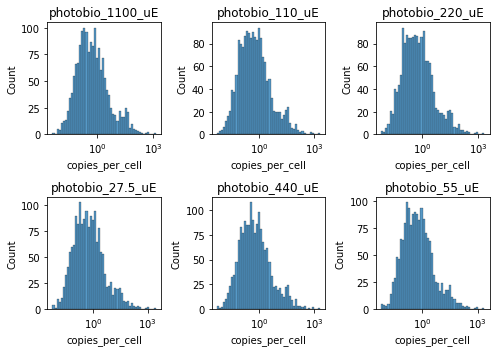

In [6]:
# Repeat for cyanobacteria bioreactor data
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(7, 5))
flat_axs = axs.flatten()

for i, (idx, gdf) in enumerate(cyano_bioreactor.groupby('condition')):
    plt.sca(flat_axs[i])
    plt.xscale('log')
    mask = gdf.copies_per_cell > 0
    sns.histplot(data=gdf[mask], x='copies_per_cell', bins=50)
    
    # Fit the log-scaled data to a Gaussian
    vals = gdf[mask].copies_per_cell.values
    gm = GaussianMixture(n_components=1)
    gm.fit(np.log(vals).reshape(-1, 1))
    mu = gm.means_[0][0]
    sigma = np.sqrt(gm.covariances_[0][0][0])
    print(f'{idx}: mu={mu:.2f}, sigma={sigma:.2f}')
    flat_axs[i].set_title(idx)

plt.tight_layout()
plt.show()

In [7]:
# Load the resampled CDS data -- script in the munge/ directory
eq_weight_nosc_est_df = pd.read_csv('../data/genomes/all_ref_prot_NOSC_unweighted_monte_carlo_samples.csv')
weighted_nosc_est_df = pd.read_csv('../data/genomes/all_ref_prot_NOSC_weighted_monte_carlo_samples.csv')

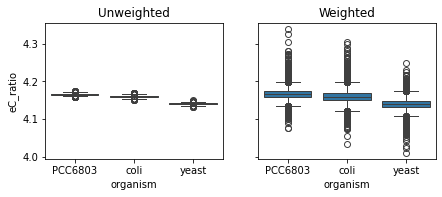

In [8]:
# Compare the weighted and unweighted samples
fig, axs = plt.subplots(ncols=2, figsize=(7,2.5), sharey=True)

plt.sca(axs[0])
sns.boxplot(data=eq_weight_nosc_est_df, x='organism', y='eC_ratio')
plt.title('Unweighted')

plt.sca(axs[1])
plt.title('Weighted')
sns.boxplot(data=weighted_nosc_est_df, x='organism', y='eC_ratio')

plt.show()